### Cab-Driver Agent

In [1]:
# Importing libraries
import numpy as np
import random
import math
from collections import deque
import collections
import pickle
import time 

# for building DQN model
from keras import layers
from keras import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

# for plotting graphs
import matplotlib.pyplot as plt

# Import the environment
from Env import CabDriver

#### Defining Time Matrix

In [2]:
# Loading the time matrix provided
Time_matrix = np.load("TM.npy")

In [3]:
# Debug print flag 

DEBUG = True

#### Tracking the state-action pairs for checking convergence


In [4]:
def initialise_tracking_states():
#     sample_q_values = [('1-14-1', '2-5'), ('1-14-1', '2-4'), ('1-14-1', '0-1'), ('1-14-1', '4-5'), ('1-14-1', '3-4'), ('1-14-1', '1-2'), ('1-14-1', '2-3')]    
    sample_q_values = [ ('1-20-6', '0-1'),
                        ('1-20-6', '0-2'),
                        ('1-20-6', '0-3'),
                        ('1-20-6', '0-4'),
                        ('1-20-6', '1-0'),
                        ('1-20-6', '1-2'),
                        ('1-20-6', '1-3'),
                        ('1-20-6', '1-4'),
                        ('1-20-6', '4-1'),
                        ('1-20-6', '4-2'),
                        ('1-20-6', '4-3'),
                        ('1-20-6', '0-0'),
                        ('1-20-6', '0-1'),
                        ('1-20-6', '0-2'),
                        ('1-5-5', '1-0'),
                        ('1-5-5', '1-2'),
                        ('1-5-5', '1-3'),
                        ('1-5-5', '1-4'),
                        ('1-5-5', '2-0'),
                        ('1-5-5', '2-1'),
                        ('1-5-5', '2-3'),
                        ('1-5-5', '2-4'),
                        ('1-5-5', '3-0'),
                        ('1-5-5', '3-1'),
                        ('1-5-5', '3-2'),
                        ('1-5-5', '3-4'),
                        ('1-5-5', '4-0'),
                        ('1-5-5', '4-1'),
                        ('1-5-5', '4-2'),
                        ('1-5-5', '4-3')]
    for q_value in sample_q_values:
        state = q_value[0]
        action = q_value[1]
        States_track[state][action] = []

In [5]:
def save_tracking_states(curr_state, curr_action, q_value):
    for state in States_track.keys():
        if state == curr_state:
            for action in States_track[state].keys():
                if action == curr_action:
                    States_track[state][action].append(q_value)

In [6]:
def to_string(state_or_action):
    return ('-'.join(str(e) for e in state_or_action))

In [7]:
#Defining a function to save the Q-dictionary as a pickle file
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

### Agent Class

If you are using this framework, you need to fill the following to complete the following code block:
1. State and Action Size
2. Hyperparameters
3. Create a neural-network model in function 'build_model()'
4. Define epsilon-greedy strategy in function 'get_action()'
5. Complete the function 'append_sample()'. This function appends the recent experience tuple <state, action, reward, new-state> to the memory
6. Complete the 'train_model()' function with following logic:
   - If the memory size is greater than mini-batch size, you randomly sample experiences from memory as per the mini-batch size and do the following:
      - Initialise your input and output batch for training the model
      - Calculate the target Q value for each sample: reward + gamma*max(Q(s'a,))
      - Get Q(s', a) values from the last trained model
      - Update the input batch as your encoded state and output batch as your Q-values
      - Then fit your DQN model using the updated input and output batch.

In [8]:
class DQNAgent:
    def __init__(self, state_size, action_size, action_space):
        # Define size of state and action
        self.state_size = state_size
        self.action_size = action_size
        self.action_space = action_space

        # Write here: Specify you hyper parameters for the DQN
        self.discount_factor = 0.99
        self.learning_rate = 0.001       
        self.epsilon_max = 1.0
        self.epsilon_decay = 0.0009 #0.999
        self.epsilon_min = 0
        
        self.batch_size = 32    
        # create replay memory using deque
        self.memory = deque(maxlen=2000)

        # create main model and target model
        self.model = self.build_model()

    # approximate Q function using Neural Network
    def build_model(self):
        model = Sequential()
        # Write your code here: Add layers to your neural nets
        model.add(Dense(32, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(32, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(self.action_size, activation='linear',
                        kernel_initializer='he_uniform'))
        # model.summary() 
        
        model.compile(loss='mse',optimizer=Adam(lr=self.learning_rate))
        model.summary
        return model

    def get_epsilon(self, time):
        return self.epsilon_min + (self.epsilon_max - self.epsilon_min) * np.exp(-self.epsilon_decay*time)

    def get_action(self, state, time):
    # Write your code here:
    # get action from model using epsilon-greedy policy
    # Decay in ε after we generate each sample from the environment       

        epsilon = self.get_epsilon(time)

        possible_actions_index, all_possible_actions = env.requests(state)

        if len(possible_actions_index) == 0:
            return all_possible_actions[0]

        if (np.random.rand() <= epsilon):
            return random.choice(all_possible_actions)
        # if generated random number is greater than ε, choose the action which has max Q-value
        else:
            state = env.state_encod_arch1(state)
            state = state.reshape(1, self.state_size)
            q_values = self.model.predict(state)[0]
            
            argmax = np.argmax(q_values[possible_actions_index])
#             DEBUG and print(f'q_values: {q_values}, available_q_vals: {q_values[possible_actions_index]}, argmax: {argmax}, all_possible_actions: {all_possible_actions}')
            return all_possible_actions[argmax]

    def append_sample(self, state, action, reward, next_state):
    # Write your code here:
    # save sample <s,a,r,s'> to the replay memory
        self.memory.append((state, action, reward, next_state))
    
    def get_q_values(self, state):
        return self.model.predict(state)[0]
    
    # pick samples randomly from replay memory (with batch_size) and train the network
    def train_model(self):
        if len(self.memory) > self.batch_size:
            # Sample batch from the memory
            mini_batch = random.sample(self.memory, self.batch_size)
            update_output = np.zeros((self.batch_size, self.state_size)) # write here
            update_input = np.zeros((self.batch_size, self.state_size)) # write here
            
            actions, rewards = [], []
            
            for i in range(self.batch_size):
                state, action, reward, next_state = mini_batch[i]
                # Write your code from here
                # 1. Predict the target from earlier model
                update_input[i] = env.state_encod_arch1(state).reshape(1, self.state_size)
                actions.append(action)
                rewards.append(reward)
                update_output[i] = env.state_encod_arch1(next_state).reshape(1, self.state_size)                
                
            # 2. Get the target for the Q-network
            target = self.model.predict(update_input)
            target_qval = self.model.predict(update_output)
            
            #3. Update your 'update_output' and 'update_input' batch
            for i in range(self.batch_size):
                # if done[i]:
                #     target[i][actions[i]] = rewards[i]
                # else: # non-terminal state
                action_idx = np.where(action_space == actions[i])
                target[i][action_idx] = rewards[i] + self.discount_factor * np.max(target_qval[i])

            # 4. Fit your model and track the loss values
            self.model.fit(update_input, target, batch_size=self.batch_size, epochs=1, verbose=0)


    def save(self, name):
        self.model.save(name)

In [9]:
Episodes = 1

env = CabDriver()
action_space, state_space, state = env.reset()
action_size = len(action_space)
state_size = len(env.state_encod_arch1(state_space[0]))

agent = DQNAgent(state_size, action_size, action_space)

States_track = collections.defaultdict(dict)
initialise_tracking_states()

scores = []

start_time = time.time()


### DQN block

In [10]:
for episode in range(Episodes):

    # Write code here
    # Call the environment
    # Call all the initialised variables of the environment
    

    #Call the DQN agent

    day = 0
    score = 0
    terminal_state = False

    # reset the state before new episode
    _, _, state = env.reset()
    initial_state = state
        
    while not terminal_state:        
        # Write your code here
        # 1. Pick epsilon-greedy action from possible actions for the current state
        
        action_start_time = time.time()
        action = agent.get_action(state, episode)
        print("Action time:",  time.time() -  action_start_time)
        
        # 2. Evaluate your reward and next state
        step_start_time = time.time()
        next_state, reward = env.step(state, action, Time_matrix)
        print("Step time:",  time.time() -  step_start_time)
        
        # 3. Append the experience to the memory
        agent.append_sample(state, action, reward, next_state)
        
        # 4. Train the model by calling function agent.train_model
        train_start_time = time.time()
        agent.train_model()
        print("Train time:",  time.time() -  train_start_time)
        
        # 5. Keep a track of rewards, Q-values, loss
        score += reward
        scores.append(score)
        
        # increase the date if the day is changed
        if next_state[2] != state[2]:
            day = day + 1
        
#         DEBUG and print(f'state: {state}, action: {action}, next_state: {next_state}, reward: {reward}, day: {day}')

        if day > 30:
            terminal_state = True

        state = next_state

    print(f'Score {episode}: {score}')
    
        # for tracking
    
    tracking_start_time = time.time()
    state_enc = env.state_encod_arch1(initial_state)
    state_enc = np.reshape(state_enc, [1, 36])
    q_values = agent.get_q_values(state_enc)
    
    state_string = to_string(initial_state)
    
    for index in range(len(env.action_space)):
        action_string = to_string(env.action_space[index])
        save_tracking_states(state_string, action_string, q_values[index])
    
    print("Tracking time:",  time.time() -  tracking_start_time) 
    

elapsed_time = time.time() - start_time
print(f'Entire Operation took {elapsed_time} seconds')

Action time: 0.0009984970092773438
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0009961128234863281
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.0
Train time: 0.0
Action time: 0.0
Step time: 0.001001119613647461
Tra

Train time: 0.3090043067932129
Action time: 0.0
Step time: 0.0
Train time: 0.26799488067626953
Action time: 0.0
Step time: 0.0
Train time: 0.3399975299835205
Action time: 0.0
Step time: 0.0
Train time: 0.27599501609802246
Action time: 0.0
Step time: 0.0
Train time: 0.29799985885620117
Action time: 0.0009992122650146484
Step time: 0.0
Train time: 0.33500123023986816
Action time: 0.0
Step time: 0.0
Train time: 0.41300177574157715
Action time: 0.00099945068359375
Step time: 0.0
Train time: 0.34199976921081543
Action time: 0.0
Step time: 0.0
Train time: 0.24900317192077637
Action time: 0.0010025501251220703
Step time: 0.0
Train time: 0.22399568557739258
Action time: 0.0
Step time: 0.0
Train time: 0.22000551223754883
Action time: 0.000995635986328125
Step time: 0.0
Train time: 0.20799922943115234
Action time: 0.0
Step time: 0.0
Train time: 0.26000356674194336
Action time: 0.0
Step time: 0.0009887218475341797
Train time: 0.32399940490722656
Action time: 0.0
Step time: 0.0
Train time: 0.30800

In [11]:
print(scores)

[-5, -5.0, -2.0, -13.0, -9.0, -1.0, 39.0, 43.0, 47.0, 63.0, 58.0, 62.0, 57.0, 56.0, 51.0, 73.0, 71.0, 65.0, 76.0, 84.0, 94.0, 89.0, 101.0, 96.0, 104.0, 99.0, 99.0, 107.0, 101.0, 96.0, 64.0, 74.0, 44.0, 42.0, 37.0, 32.0, 44.0, 72.0, 69.0, 46.0, 58.0, 61.0, 56.0, 49.0, 71.0, 66.0, 61.0, 77.0, 98.0, 102.0, 96.0, 116.0, 136.0, 131.0, 126.0, 121.0, 110.0, 100.0, 57.0, 52.0, 42.0, 28.0, 26.0, 51.0, 62.0, 86.0, 81.0, 80.0, 67.0, 64.0, 59.0, 59.0, 41.0, 41.0, 36.0, 12.0, 30.0, 28.0, 40.0, 50.0, 45.0, 44.0, 39.0, 46.0, 25.0, 20.0, 15.0, 21.0, 16.0, -3.0, -4.0, -9.0, 15.0, 4.0, 12.0, 36.0, 49.0, 46.0, 53.0, 48.0, 29.0, 29.0, 11.0, 35.0, 30.0, 54.0, 66.0, 61.0, 56.0, 54.0, 26.0, 21.0, 16.0, 28.0, 64.0, 64.0, 64.0, 64.0, 76.0, 71.0, 66.0, 61.0, 65.0, 68.0, 63.0, 57.0, 52.0, 47.0, 76.0, 71.0, 85.0, 63.0, 87.0, 76.0, 96.0, 109.0, 81.0, 76.0, 46.0, 46.0, 41.0, 72.0, 78.0, 87.0]


### Tracking Convergence

#### Epsilon-decay sample function

<div class="alert alert-block alert-info">
Try building a similar epsilon-decay function for your model.
</div>

In [12]:
time = np.arange(0,10000)
epsilon = []
for i in range(0,10000):
    # epsilon.append(0 + (1 - 0) * np.exp(-0.0009*i))
    epsilon.append(agent.get_epsilon(i))

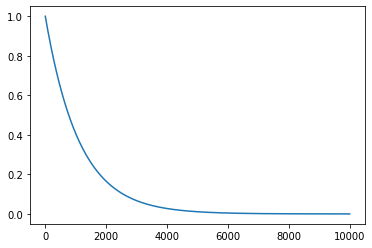

In [13]:
plt.plot(time, epsilon)
plt.show()